# Dependencies

In [1]:
pacman::p_load(igraph, graphlayouts, ggraph, ggforce, dplyr)

# Functions

In [2]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")

# Paths

In [1]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [2]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

bind all metadata

In [3]:
load(file = paste0(datapath,"capTCRseq/meta_div_TRB.RData"))

Warning message in load(file = paste0(datapath, "capTCRseq/meta_div_TRB.RData")):
"strings not representable in native encoding will be translated to UTF-8"


In [7]:
pbmc <- meta_div[ meta_div$sampletype == "PBMC",]

In [9]:
head(pbmc)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,Pass,CD3,⋯,observed_Shannon,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,file,basename,Group,sampletype
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,CHP_10YO_M_00,CHP_10YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,⋯,10.591,10.601,0.074,8.556,8.561,0.097,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_10YO-M_PBMC_DNA.txt,CHP_10YO-M_PBMC_DNA,CHP,PBMC
2,CHP_11YO_M_00,CHP_11YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,⋯,11.607,11.614,0.055,10.406,10.414,0.074,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_11YO-M_PBMC_DNA.txt,CHP_11YO-M_PBMC_DNA,CHP,PBMC
3,CHP_15YO_F_A_00,CHP_15YO_F_A,X00,NA,NA,NA,Normal,NA,NA,NA,⋯,8.982,8.989,0.042,8.560,8.570,0.060,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-A_PBMC_DNA.txt,CHP_15YO-F-A_PBMC_DNA,CHP,PBMC
4,CHP_15YO_F_B_00,CHP_15YO_F_B,X00,NA,NA,NA,Normal,NA,NA,NA,⋯,6.330,6.334,0.039,5.870,5.876,0.059,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-B_PBMC_DNA.txt,CHP_15YO-F-B_PBMC_DNA,CHP,PBMC
5,CHP_15YO_M_00,CHP_15YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,⋯,21.110,21.120,0.040,20.321,20.339,0.079,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-M_PBMC_DNA.txt,CHP_15YO-M_PBMC_DNA,CHP,PBMC
6,CHP_16YO_M_00,CHP_16YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,⋯,3.972,3.973,0.007,3.944,3.946,0.012,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_16YO-M_PBMC_DNA.txt,CHP_16YO-M_PBMC_DNA,CHP,PBMC


In [11]:
summary(pbmc$Reads)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
     10    1023    3223   31566   27406  363060     256 

In [6]:
load(file = paste0(datapath, "Adaptivedatasets/allAdaptive.RData"))

In [7]:
head(meta_div)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,Pass,CD3,⋯,observed_Shannon,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,file,basename,Group,sampletype
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,CHP_10YO_M_00,CHP_10YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,⋯,10.591,10.601,0.074,8.556,8.561,0.097,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_10YO-M_PBMC_DNA.txt,CHP_10YO-M_PBMC_DNA,CHP,PBMC
2,CHP_11YO_M_00,CHP_11YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,⋯,11.607,11.614,0.055,10.406,10.414,0.074,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_11YO-M_PBMC_DNA.txt,CHP_11YO-M_PBMC_DNA,CHP,PBMC
3,CHP_15YO_F_A_00,CHP_15YO_F_A,X00,NA,NA,NA,Normal,NA,NA,NA,⋯,8.982,8.989,0.042,8.560,8.570,0.060,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-A_PBMC_DNA.txt,CHP_15YO-F-A_PBMC_DNA,CHP,PBMC
4,CHP_15YO_F_B_00,CHP_15YO_F_B,X00,NA,NA,NA,Normal,NA,NA,NA,⋯,6.330,6.334,0.039,5.870,5.876,0.059,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-B_PBMC_DNA.txt,CHP_15YO-F-B_PBMC_DNA,CHP,PBMC
5,CHP_15YO_M_00,CHP_15YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,⋯,21.110,21.120,0.040,20.321,20.339,0.079,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-M_PBMC_DNA.txt,CHP_15YO-M_PBMC_DNA,CHP,PBMC
6,CHP_16YO_M_00,CHP_16YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,⋯,3.972,3.973,0.007,3.944,3.946,0.012,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_16YO-M_PBMC_DNA.txt,CHP_16YO-M_PBMC_DNA,CHP,PBMC


In [8]:
meta_div$study <- "INTERCEPT"
meta_div$Agegroup <- meta_div$Age
meta_div$Sex <- NA
meta_div$disease <- meta_div$cancergroup
meta_div$sample_name <- meta_div$basename

In [9]:
#remove those samples that we did not have the TCRseq data for
meta_div <- meta_div[!is.na(meta_div$sample_name),]

In [10]:
allAdaptive$sampletype <- "PBMC"
allAdaptive$sampletype[grepl("Cord", allAdaptive$sample_name )] <- "Cord blood"

In [11]:
mycols <- intersect(colnames(meta_div), colnames(allAdaptive))

In [12]:
all_metadata <- rbind(allAdaptive[,mycols], meta_div[,mycols])

In [13]:
dim(all_metadata)

[1] 1811    6

gliph input and filtered output

In [16]:
load(file = paste0(h4hpath, "analysis/GLIPH/top10000_notallAAchange/int_adaptivetop10000_vdj_gliph_rm_na_singlerm.RData"))

In [17]:
ls()

[1] "age_pal"      "allAdaptive"  "all_metadata" "cohort_col"   "cycle_col"   
 [6] "datapath"     "gitpath"      "gliph_all"    "group_col"    "h4hpath"     
[11] "manifestpath" "meta_div"     "myaxis"       "mycols"       "myplot"      
[16] "plotpath"     "type_col"

In [18]:
head(gliph_all)

,Sample,index.x,pattern,Fisher_score,number_subject,number_unique_cdr3,final_score,hla_score,vb_score,expansion_score,⋯,TcRa,Freq,CDR3b,TRBV,TRBJ,count,clonefraction,subject,file,index.y
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,310101_TCRB:7470108,44,%Q,2.9e-06,176,163,9.5e-09,1,1,0.95,⋯,NA,0,CASTQAFF,TRBV07-09,TRBJ01-01,NA,1.023280e-04,310101_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310101_TCRB.tsv,7470108
2,310101_TCRB:7470108,6,T%,1.1e-18,373,359,1.0e-09,1,1,0.10,⋯,NA,0,CASTQAFF,TRBV07-09,TRBJ01-01,NA,1.023280e-04,310101_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310101_TCRB.tsv,7470108
3,310101_TCRB:7470791,124,%NT,2.5e-04,92,92,9.6e-09,1,1,0.96,⋯,NA,0,CATLNTIYF,TRBV24-01,TRBJ01-03,NA,5.116398e-05,310101_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310101_TCRB.tsv,7470791
4,310101_TCRB:7471085,65,IWW,1.2e-05,63,64,1.0e-06,1,1,0.14,⋯,NA,0,CASSEIWWEGLNEQFF,TRBV06-01,TRBJ02-01,NA,5.116398e-05,310101_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310101_TCRB.tsv,7471085
5,310101_TCRB:7471842,28,S%P,7.2e-08,258,238,5.2e-09,1,1,0.52,⋯,NA,0,CASSFPLHF,TRBV07-09,TRBJ01-06,NA,5.116398e-05,310101_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310101_TCRB.tsv,7471842
6,310101_TCRB:7472600,101,R%E,9.3e-05,287,216,9.2e-09,1,1,0.92,⋯,NA,0,CAGRGERYF,TRBV04-01,TRBJ02-07,NA,5.116398e-05,310101_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310101_TCRB.tsv,7472600


merge gliph_all and metadata

In [24]:
gliph_meta <- merge(gliph_all, all_metadata, by.x = "subject", by.y = "sample_name")

In [25]:
# create a patient column
gliph_meta$patient <- gsub(":.*", "", gliph_meta$Sample)

In [83]:
colnames(gliph_meta)

[1] "subject"            "Sample"             "index.x"           
 [4] "pattern"            "Fisher_score"       "number_subject"    
 [7] "number_unique_cdr3" "final_score"        "hla_score"         
[10] "vb_score"           "expansion_score"    "length_score"      
[13] "cluster_size_score" "type"               "TcRb"              
[16] "V"                  "J"                  "TcRa"              
[19] "Freq"               "CDR3b"              "TRBV"              
[22] "TRBJ"               "count"              "clonefraction"     
[25] "file"               "index.y"            "sampletype"        
[28] "study"              "Agegroup"           "Sex"               
[31] "disease"            "patient"

Make an incidence matrix

In [71]:
pat_type <- as.data.frame.matrix(table(gliph_meta %>% select(type, patient)))

In [54]:
library("entropart")
data("Paracou618")

In [102]:
pat_type[, colnames(pat_type)[grepl("CHP", colnames(pat_type))]] 

,CHP-328,CHP-351,CHP-353,CHP-363,CHP-369,CHP-371,CHP-377,CHP-386,CHP-398,CHP_323,⋯,CHP_402,CHP_403,CHP_404,CHP_405,CHP_407,CHP_408,CHP_411,CHP_412,CHP_416,CHP_422
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
global-%A,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
global-%AE,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
global-%AG,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
global-%ANV,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
global-%D,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
global-%DR,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
global-%E,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
global-%EG,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
global-%EK,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [73]:
mymc <- MetaCommunity(Abundances = pat_type)

Warning message in FUN(newX[, i], ...):
"Sample coverage is 0, most bias corrections will return NaN."
Warning message in FUN(newX[, i], ...):
"Sample coverage is 0, most bias corrections will return NaN."
Warning message in FUN(newX[, i], ...):
"Sample coverage is 0, most bias corrections will return NaN."
Warning message in FUN(newX[, i], ...):
"Sample coverage is 0, most bias corrections will return NaN."
Warning message in FUN(newX[, i], ...):
"Sample coverage is 0, most bias corrections will return NaN."
Warning message in FUN(newX[, i], ...):
"Sample coverage is 0, most bias corrections will return NaN."
Warning message in FUN(newX[, i], ...):
"Sample coverage is 0, most bias corrections will return NaN."
Warning message in FUN(newX[, i], ...):
"Sample coverage is 0, most bias corrections will return NaN."
Warning message in FUN(newX[, i], ...):
"Sample coverage is 0, most bias corrections will return NaN."
Warning message in FUN(newX[, i], ...):
"Sample coverage is 0, most bias 

In [76]:
mydiv <- DivPart(q=1, mymc)


In [80]:
alldivs <- mydiv$CommunityAlphaDiversities

In [92]:
gliph_meta_dedup <- gliph_meta[ !duplicated(gliph_meta$patient),]

In [93]:
dim(gliph_meta_dedup)

[1] 1023   32

In [96]:
gliph_meta_dedup$diversity <- alldivs[match(gliph_meta_dedup$patient, names(alldivs))]

In [110]:
gliph_meta_dedup <- gliph_meta_dedup[ gliph_meta_dedup$disease != "LFS",]

In [114]:
pairwise.t.test(gliph_meta_dedup$diversity, gliph_meta_dedup$disease, p.adjust.method = "BH")


	Pairwise comparisons using t tests with pooled SD 

data:  gliph_meta_dedup$diversity and gliph_meta_dedup$disease 

                     Ctrl    Cytomegalovirus + Cytomegalovirus - KD     
Cytomegalovirus +    9.3e-09 -                 -                 -      
Cytomegalovirus -    3.7e-11 0.4329            -                 -      
KD                   0.0698  0.5909            0.7047            -      
Leukemia             < 2e-16 < 2e-16           < 2e-16           3.7e-16
Lymphoma             < 2e-16 < 2e-16           < 2e-16           9.6e-14
MAS                  0.5775  0.1085            0.0845            0.1000 
MIS-C SARSCoV2Neg    0.8028  0.1257            0.0881            0.1297 
MIS-C SARSCoV2Pos    0.0153  8.6e-08           1.1e-08           0.0029 
Peds COVID19         0.5813  0.0130            0.0059            0.0572 
Peds febrile Control 0.5909  0.0483            0.0290            0.0761 
Peds healthy Control 0.5339  0.5037            0.3872            0.3872 
Solid

In [108]:
tapply(gliph_meta_dedup$diversity, gliph_meta_dedup$disease, summary)

$Ctrl
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   19.66   23.95   24.36   28.83   46.26 

$`Cytomegalovirus +`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.69   23.78   28.10   28.78   33.90   48.74 

$`Cytomegalovirus -`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   24.39   28.75   29.32   34.16   52.35 

$KD
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.57   29.43   29.48   30.90   32.84   41.18 

$LFS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      7       7       7       7       7       7 

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   3.134   5.000   9.000 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.455   3.500   5.000 

$MAS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.52   20.13   20.75   21.41   22.35   23.95 

$`MIS-C SARSCoV2Neg`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.15   23.40   24.14   23.27   24.37   30.31 

$`MIS-

In [50]:
apply(pat_type, 1, function(x) table(unlist(x)))

$`310101_TCRB`

  0   1   2 
185  21   1 

$`310102_TCRB`

  0   1   2   3 
178  24   4   1 

$`310103_TCRB`

  0   1 
192  15 

$`310104_TCRB`

  0   1   2 
183  20   4 

$`310105_TCRB`

  0   1   2   3   4 
170  27   8   1   1 

$`310106_TCRB`

  0   1   2   3 
177  24   5   1 

$`310108_TCRB`

  0   1   2 
185  21   1 

$`310109_TCRB`

  0   1   2   4 
173  32   1   1 

$`310110_TCRB`

  0   1   2 
181  23   3 

$`310111_TCRB`

  0   1   2 
173  31   3 

$`310112_TCRB`

  0   1   2   3 
176  27   3   1 

$`310113_TCRB`

  0   1   2 
187  17   3 

$`310114_TCRB`

  0   1   2 
173  31   3 

$`310115_TCRB`

  0   1   2   3 
172  26   8   1 

$`310116_TCRB`

  0   1   2 
187  17   3 

$`310117_TCRB`

  0   1   2   3 
176  29   1   1 

$`310118_TCRB`

  0   1   2 
184  22   1 

$`310119_TCRB`

  0   1   2   6 
182  21   3   1 

$`310120_TCRB`

  0   1   2   3 
176  25   5   1 

$`310121_TCRB`

  0   1   2 
184  19   4 

$`310122_TCRB`

  0   1   2 
183  22   2 

$`310123_TCRB`

  0   1  

In [20]:
gliph_data_igrf <- igraph::graph_from_incidence_matrix(gliph_data_matrix_df, weighted = T )

In [21]:
# match the subject to the TcRb
V(gliph_data_igrf)$subject <- sapply(V(gliph_data_igrf)$name, function(x){
    gliph_all$subject[match(x, gliph_all$TcRb)]})

In [22]:
# match the subject to the GLIPH type
V(gliph_data_igrf)$subject[is.na(V(gliph_data_igrf)$subject)] <- sapply(V(gliph_data_igrf)$name[is.na(V(gliph_data_igrf)$subject)], function(x){
    gliph_all$subject[match(x, gliph_all$type)]
})

In [23]:
head(V(gliph_data_igrf)$name)

[1] "global-%A"   "global-%AE"  "global-%AG"  "global-%ANV" "global-%D"  
[6] "global-%DR"

In [24]:
tail(V(gliph_data_igrf)$subject)

[1] "P00602"      "P00065"      "310243_TCRB" "310109_TCRB" "P00642"     
[6] "310168_TCRB"

In [25]:
head(all_metadata)

,sampletype,study,Agegroup,Sex,disease,sample_name
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,PBMC,Carey,NA,Male,Ctrl,Preterm_23_3
2,PBMC,Carey,NA,Female,Ctrl,Preterm_25_5
3,PBMC,Carey,NA,Male,Ctrl,Preterm_26_B_2
4,PBMC,Carey,NA,Female,Ctrl,Preterm_27_4
5,PBMC,Carey,Adult,NA,Ctrl,Adult_1_15-04
6,PBMC,Carey,Adult,NA,Ctrl,Adult_2_15-07


In [26]:
table(all_metadata$disease)


                Ctrl    Cytomegalovirus +    Cytomegalovirus - 
                 119                  340                  420 
                  KD                  LFS             Leukemia 
                   5                   10                  275 
            Lymphoma                  MAS    MIS-C SARSCoV2Neg 
                 103                    3                    5 
   MIS-C SARSCoV2Pos               Normal         Peds COVID19 
                  19                   14                   10 
Peds febrile Control Peds healthy Control                Solid 
                   6                    7                  183 
                 T1D      Type 1 Diabetes                 sJIA 
                 116                  143                    7 

In [27]:
V(gliph_data_igrf)$disease <- sapply(V(gliph_data_igrf)$subject, function(x){
    all_metadata$disease[match(x, all_metadata$sample_name)]})


In [28]:
V(gliph_data_igrf)$study <- sapply(V(gliph_data_igrf)$subject, function(x){
    all_metadata$study[match(x, all_metadata$sample_name)]})

In [29]:
V(gliph_data_igrf)$sampletype <- sapply(V(gliph_data_igrf)$subject, function(x){
    all_metadata$sampletype[match(x, all_metadata$sample_name)]})

In [30]:
table(V(gliph_data_igrf)$disease)


                Ctrl    Cytomegalovirus +    Cytomegalovirus - 
                2508                 5654                 6984 
                  KD                  LFS             Leukemia 
                 125                    5                  156 
            Lymphoma                  MAS    MIS-C SARSCoV2Neg 
                  18                   61                   85 
   MIS-C SARSCoV2Pos         Peds COVID19 Peds febrile Control 
                 275                  130                   84 
Peds healthy Control                Solid                  T1D 
                  95                   30                 2606 
                sJIA 
                 103 

In [31]:
gliph_data_igrf

IGRAPH 2a16546 UNWB 19336 26010 -- 
+ attr: type (v/l), name (v/c), subject (v/c), disease (v/c), study
| (v/c), sampletype (v/c), weight (e/n)
+ edges from 2a16546 (vertex names):
 [1] global-%A--CAATAQIF global-%A--CAGRAQFF global-%A--CAKEAQSK
 [4] global-%A--CALVAQHF global-%A--CANAACTF global-%A--CAPAAVHF
 [7] global-%A--CAPGAWFF global-%A--CAPRAQHF global-%A--CAPSAQYF
[10] global-%A--CARGAAFF global-%A--CARGAQFF global-%A--CARKAAFF
[13] global-%A--CARLAAFF global-%A--CARLAQYF global-%A--CARRALHF
[16] global-%A--CARRAQYF global-%A--CASGAAFF global-%A--CASGADTF
[19] global-%A--CASGAGHF global-%A--CASGAGVF global-%A--CASGAHTF
+ ... omitted several edges

# Communities of GLIPH specificity groups

In [32]:
bipartite.projection(gliph_data_igrf)$proj1

IGRAPH df08c83 UNW- 207 373 -- 
+ attr: name (v/c), subject (v/c), disease (v/c), study (v/c),
| sampletype (v/c), weight (e/n)
+ edges from df08c83 (vertex names):
 [1] global-%A --global-T%  global-%A --global-R%  global-%A --global-V% 
 [4] global-%A --global-A%  global-%A --global-G%  global-%A --global-S% 
 [7] global-%A --global-K%  global-%A --global-L%  global-%A --global-H% 
[10] global-%A --global-Y%  global-%AE--global-T%E global-%AE--global-R%E
[13] global-%AE--global-L%E global-%AE--global-S%E global-%AE--global-N%E
[16] global-%AE--global-A%E global-%AE--global-E%E global-%AE--global-V%E
[19] global-%AE--global-Y%E global-%AE--global-H%E global-%AG--global-S%G
+ ... omitted several edges

In [33]:
myg <- (bipartite.projection(gliph_data_igrf)$proj1)

In [34]:
myg1 <- myg#delete_vertices( myg, degree(myg) == 0)

In [35]:
myk <- cluster_louvain(myg1, resolution = 1, weights = NULL)

In [36]:
#myk <- cluster_edge_betweenness(myg1)


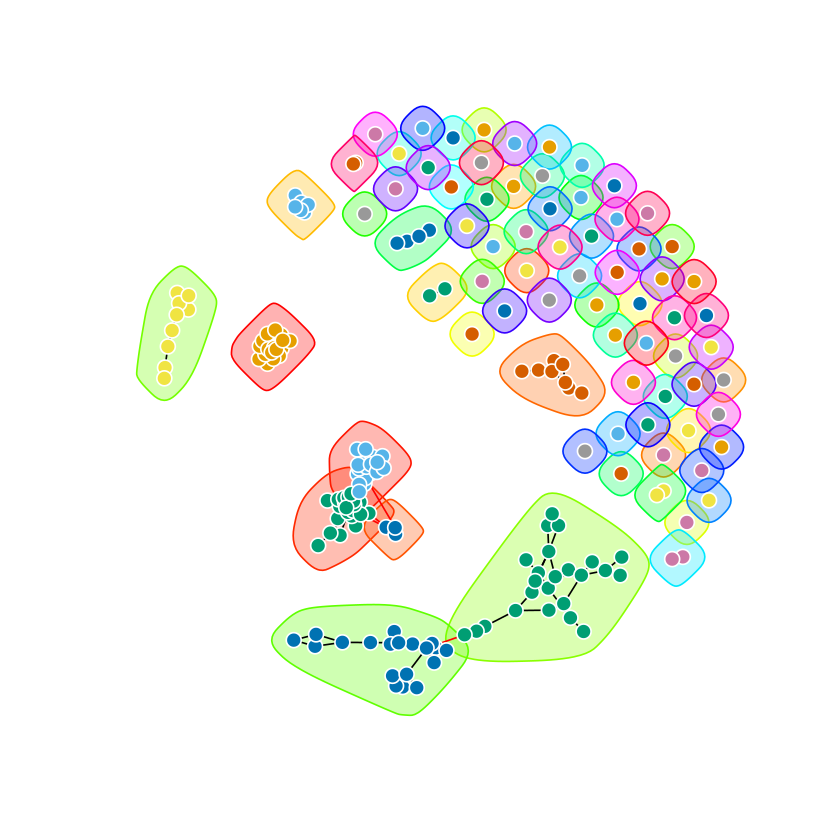

In [37]:
plot(myk, myg1, vertex.label=NA, vertex.frame.color="white", vertex.size=5)

In [38]:
V(myg1)$community <- as.character(myk$membership)

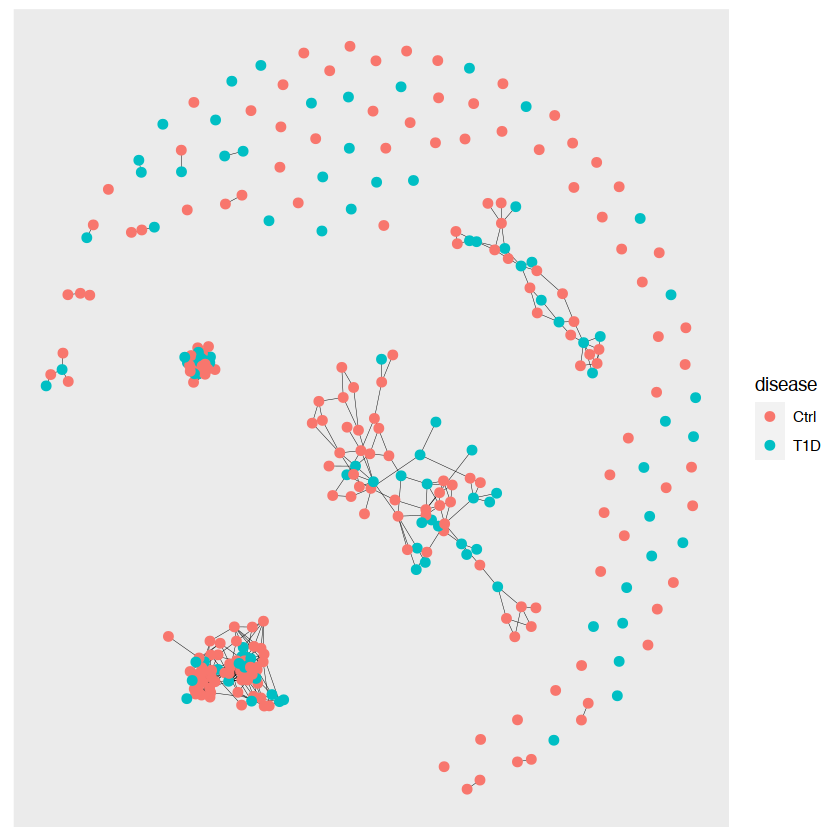

In [39]:
ggraph(myg1 , "fr", weights = NULL ) +
geom_edge_link(edge_width = 0.1, edge_colour = "#000000") + 
geom_node_point(aes(color = disease), size = 2)

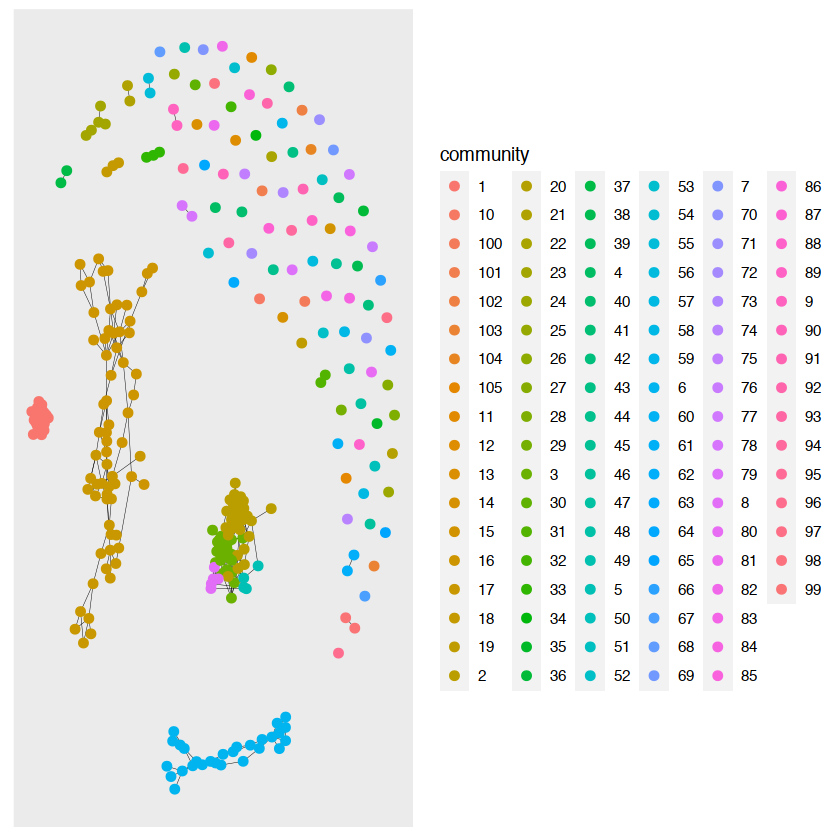

In [40]:
ggraph(myg1 , "fr", weights = NULL ) +
geom_edge_link(edge_width = 0.1, edge_colour = "#000000") + 
geom_node_point(aes(color = community), size = 2)

In [41]:
head(all_metadata)

,sampletype,study,Agegroup,Sex,disease,sample_name
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,PBMC,Carey,NA,Male,Ctrl,Preterm_23_3
2,PBMC,Carey,NA,Female,Ctrl,Preterm_25_5
3,PBMC,Carey,NA,Male,Ctrl,Preterm_26_B_2
4,PBMC,Carey,NA,Female,Ctrl,Preterm_27_4
5,PBMC,Carey,Adult,NA,Ctrl,Adult_1_15-04
6,PBMC,Carey,Adult,NA,Ctrl,Adult_2_15-07


In [42]:
head(gliph_all[,10:20])

,expansion_score,length_score,cluster_size_score,type,TcRb,V,J,TcRa,Freq,CDR3b,TRBV
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<chr>,<chr>
1,0.95,0.001,1e-05,global-%Q,CASTQAFF,TRBV07-09,TRBJ01-01,NA,0,CASTQAFF,TRBV07-09
2,0.11,0.001,1e-05,global-T%,CASTQAFF,TRBV07-09,TRBJ01-01,NA,0,CASTQAFF,TRBV07-09
3,0.95,0.001,1e-05,global-%NT,CATLNTIYF,TRBV24-01,TRBJ01-03,NA,0,CATLNTIYF,TRBV24-01
4,0.13,0.760,1e-05,motif-IWW,CASSEIWWEGLNEQFF,TRBV06-01,TRBJ02-01,NA,0,CASSEIWWEGLNEQFF,TRBV06-01
5,0.81,0.001,1e-05,global-SF%,CASSFPLHF,TRBV07-09,TRBJ01-06,NA,0,CASSFPLHF,TRBV07-09
6,0.68,0.001,1e-05,global-S%P,CASSFPLHF,TRBV07-09,TRBJ01-06,NA,0,CASSFPLHF,TRBV07-09


# Communities of subjects based on their correlation

In [43]:
head(gliph_all)

,Sample,index.x,pattern,Fisher_score,number_subject,number_unique_cdr3,final_score,hla_score,vb_score,expansion_score,⋯,TcRa,Freq,CDR3b,TRBV,TRBJ,count,clonefraction,subject,file,index.y
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,310101_TCRB:7470108,54,%Q,1.3e-06,182,169,9.5e-09,1,1,0.95,⋯,NA,0,CASTQAFF,TRBV07-09,TRBJ01-01,NA,1.023280e-04,310101_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310101_TCRB.tsv,7470108
2,310101_TCRB:7470108,5,T%,1.4e-20,391,387,1.1e-09,1,1,0.11,⋯,NA,0,CASTQAFF,TRBV07-09,TRBJ01-01,NA,1.023280e-04,310101_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310101_TCRB.tsv,7470108
3,310101_TCRB:7470791,164,%NT,1.9e-04,94,94,9.5e-09,1,1,0.95,⋯,NA,0,CATLNTIYF,TRBV24-01,TRBJ01-03,NA,5.116398e-05,310101_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310101_TCRB.tsv,7470791
4,310101_TCRB:7471085,83,IWW,1.2e-05,63,64,1.0e-06,1,1,0.13,⋯,NA,0,CASSEIWWEGLNEQFF,TRBV06-01,TRBJ02-01,NA,5.116398e-05,310101_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310101_TCRB.tsv,7471085
5,310101_TCRB:7471842,52,SF%,1.2e-06,142,118,8.1e-09,1,1,0.81,⋯,NA,0,CASSFPLHF,TRBV07-09,TRBJ01-06,NA,5.116398e-05,310101_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310101_TCRB.tsv,7471842
6,310101_TCRB:7471842,17,S%P,6.4e-11,314,292,6.8e-09,1,1,0.68,⋯,NA,0,CASSFPLHF,TRBV07-09,TRBJ01-06,NA,5.116398e-05,310101_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310101_TCRB.tsv,7471842


In [39]:
gliph_meta <- merge(gliph_all, all_metadata, by.x = "subject", by.y = "sample_name")

In [40]:
gliph_meta$patient <- gsub(":.*", "", gliph_meta$Sample)

In [41]:
dim(gliph_meta)

[1] 34423    32

Make an sample x cluster frequency matrix 

In [42]:
mymat <- matrix(nrow = length(unique(gliph_meta$patient)), ncol = length(unique(gliph_meta$type)),
               dimnames = list(unique(gliph_meta$patient), unique(gliph_meta$type)))

In [43]:
dim(mymat)

[1] 1023  207

In [44]:
for(s in unique(gliph_meta$patient)){
    mysample <- gliph_meta[ gliph_meta$patient == s,]
    mytab <- table(mysample$type)
    mymat[s,rownames(mytab)] <- mytab
}

In [45]:
length(unique(gliph_all$type))

[1] 207

In [46]:
dim(mymat)

[1] 1023  207

In [47]:
summary(colSums(is.na(mymat)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  325.0   871.0   920.0   884.2   949.5  1006.0 

In [48]:
# keep clusters in at least two samples
#mymat <- mymat[,colSums(is.na(mymat)) <= 1020]

In [49]:
summary(rowSums(is.na(mymat)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  148.0   173.0   179.0   178.9   184.0   206.0 

In [50]:
#keep samples with at least two clusters
#mymat <- mymat[rowSums(is.na(mymat)) <= 182,]

In [51]:
dim(mymat)

[1] 1023  207

In [52]:
# convert NA to 0
mymat[ is.na(mymat)] <- 0

In [53]:
mymat[ mymat > 1] <- 1

In [54]:
# correlation
mycormat <- cor(t(mymat), method = "spearman")

### heatmap

In [55]:
summary(as.vector(mycormat))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.25285  0.02563  0.08944  0.09078  0.15074  1.00000 

In [56]:
# convert negative correlation to 0
mycormat[mycormat < 0] <- 0

In [57]:
summary(as.vector(mycormat))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.02563 0.08944 0.09744 0.15074 1.00000 

In [58]:
library(ComplexHeatmap)

Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [59]:
makematrix_4hm <- function(df, var, name ){
    mymat <- df[[var]]
names(mymat) <- df[["patient"]]
mymat <- t(as.matrix(mymat))
rownames(mymat) <- name
    
    return(mymat)
}

In [60]:
#dedup for heatmap
gliph_meta_dedup <- gliph_meta[!duplicated(gliph_meta$patient),]

In [61]:
dim(gliph_meta_dedup)

[1] 1023   32

In [62]:
rownames(gliph_meta_dedup) <- (gliph_meta_dedup$patient)

In [63]:
gliph_meta_dedup <- gliph_meta_dedup[colnames(mycormat),]

In [64]:
dim(gliph_meta_dedup)

[1] 1023   32

In [65]:
mycohort <- makematrix_4hm(gliph_meta_dedup, "disease", "disease")
#mycycle <- makematrix_4hm(all_metadata, "cycle", "Cycle")
mysample <- makematrix_4hm(gliph_meta_dedup, "sampletype", "Sample type")
mygroup <- makematrix_4hm(gliph_meta_dedup, "study", "Study")

In [66]:
#cycle_col <- c("#bec2be", cycle_col)
#names(cycle_col)[1] <- "X00"

In [67]:
names(table(gliph_meta_dedup$disease))

[1] "Ctrl"                 "Cytomegalovirus +"    "Cytomegalovirus -"   
 [4] "KD"                   "LFS"                  "Leukemia"            
 [7] "Lymphoma"             "MAS"                  "MIS-C SARSCoV2Neg"   
[10] "MIS-C SARSCoV2Pos"    "Peds COVID19"         "Peds febrile Control"
[13] "Peds healthy Control" "Solid"                "T1D"                 
[16] "sJIA"

In [68]:
group_col <- c("blue", "red", "green", "orange", "purple")
names(group_col) <- names(table(gliph_meta_dedup$study))

In [69]:
cohort_col <- c("blue", "red", "green", "orange", "purple", "yellow", "black", "grey", "pink", 
"brown", "cyan", "magenta", "navy", "maroon", "gray","gold") 
names(cohort_col) <- names(table(gliph_meta_dedup$disease))

In [70]:
cohort_hm <- Heatmap(mycohort, col = cohort_col, height = unit(1,"cm"))

#cycle_hm <- Heatmap(mycycle, col = cycle_col, , height = unit(1,"cm"))

#sample_hm <- Heatmap(mysample, col = type_col, , height = unit(1,"cm"))

group_hm <- Heatmap(mygroup, col = group_col, , height = unit(1,"cm"))

In [71]:
#mypts <- makematrix_4hm(meta_div, "Patient", "Patient")

In [72]:
#pts_hm <- Heatmap(mypts,  height = unit(1,"cm"), show_heatmap_legend = FALSE, show_column_names = FALSE)

In [73]:
hm <- Heatmap(mycormat, show_row_names = TRUE, row_names_gp = gpar(fontsize = 3), column_names_gp = gpar(fontsize = 3))

The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.



In [74]:
pdf(paste0(plotpath, "heatmap_gliph.pdf"), width = 10, height = 10)
hm %v% group_hm %v% cohort_hm# %v% sample_hm %v% group_hm %v% pts_hm
dev.off()

pdf 
  2